In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import baostock as bs

In [11]:
#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:' + lg.error_code)
print('login respond  error_msg:' + lg.error_msg)
# 获取茅台的收盘价
maotai = bs.query_history_k_data_plus("sh.600519","date,code,open,high,low,close,preclose,volume,amount,turn,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM", start_date='2018-01-01', end_date='2021-12-31',frequency="d", adjustflag="3")
data_list = []
while (maotai.error_code == '0') & maotai.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(maotai.get_row_data())
mt = pd.DataFrame(data_list, columns=maotai.fields)
print(mt.head(5))

login success!
login respond error_code:0
login respond  error_msg:success
         date       code      open      high       low     close  preclose  \
0  2018-01-02  sh.600519  700.0000  710.1600  689.8900  703.8500  697.4900   
1  2018-01-03  sh.600519  701.5000  721.4000  699.7400  715.8600  703.8500   
2  2018-01-04  sh.600519  721.4000  743.5000  719.3300  737.0700  715.8600   
3  2018-01-05  sh.600519  741.0000  746.0300  728.2200  738.3600  737.0700   
4  2018-01-08  sh.600519  735.0200  756.5000  735.0200  752.1300  738.3600   

    volume           amount      turn    pctChg      peTTM      pbMRQ  \
0  4961248  3482407646.0000  0.394942  0.911839  36.480928  10.481447   
1  5201941  3713523701.0000  0.414102  1.706331  37.103413  10.660295   
2  7220508  5309890210.0000  0.574791  2.962873  38.202738  10.976145   
3  3998907  2946493013.0000  0.318334  0.175014  38.269600  10.995356   
4  5220456  3899951720.0000  0.415576  1.864947  38.983306  11.200413   

       psTTM  pcf

In [12]:
"""
这里的数据类型需要修改
"""
mt.columns

Index(['date', 'code', 'open', 'high', 'low', 'close', 'preclose', 'volume',
       'amount', 'turn', 'pctChg', 'peTTM', 'pbMRQ', 'psTTM', 'pcfNcfTTM'],
      dtype='object')

In [13]:
mt.describe()

,date,code,open,high,low,close,preclose,volume,amount,turn,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM
count,848,848,848,848,848,848,848,848,848,848,848,848,848,848,848
unique,848,1,742,814,792,815,815,848,848,815,846,828,828,828,828
top,2019-11-25,sh.600519,1700.0000,612.0000,1660.0000,1676.0000,1668.0000,5402821,1903829724.0000,0.254300,0.000000,51.849940,10.941492,15.882176,75.754178
freq,1,848,5,3,4,3,3,1,1,3,2,2,2,2,2


In [15]:
mt['date'] = pd.to_datetime(mt['date'], format = '%Y-%m-%d')
mt['code'] = mt['code'].astype('string')
for each in ['open', 'high', 'low', 'close', 'preclose', 'volume', 'amount', 'turn', 'pctChg', 'peTTM', 'pbMRQ', 'psTTM', 'pcfNcfTTM']:
    mt[each] = mt[each].astype('float')
print(mt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       848 non-null    datetime64[ns]
 1   code       848 non-null    string        
 2   open       848 non-null    float64       
 3   high       848 non-null    float64       
 4   low        848 non-null    float64       
 5   close      848 non-null    float64       
 6   preclose   848 non-null    float64       
 7   volume     848 non-null    float64       
 8   amount     848 non-null    float64       
 9   turn       848 non-null    float64       
 10  pctChg     848 non-null    float64       
 11  peTTM      848 non-null    float64       
 12  pbMRQ      848 non-null    float64       
 13  psTTM      848 non-null    float64       
 14  pcfNcfTTM  848 non-null    float64       
dtypes: datetime64[ns](1), float64(13), string(1)
memory usage: 99.5 KB
None


In [16]:
mt.head(5)

,date,code,open,high,low,close,preclose,volume,amount,turn,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM
0,2018-01-02,sh.600519,700.00,710.16,689.89,703.85,697.49,4961248.0,3.482408e+09,0.394942,0.911839,36.480928,10.481447,15.482036,50.003406
1,2018-01-03,sh.600519,701.50,721.40,699.74,715.86,703.85,5201941.0,3.713524e+09,0.414102,1.706331,37.103413,10.660295,15.746211,50.856629
2,2018-01-04,sh.600519,721.40,743.50,719.33,737.07,715.86,7220508.0,5.309890e+09,0.574791,2.962873,38.202738,10.976145,16.212751,52.363444
3,2018-01-05,sh.600519,741.00,746.03,728.22,738.36,737.07,3998907.0,2.946493e+09,0.318334,0.175014,38.269600,10.995356,16.241126,52.455090
4,2018-01-08,sh.600519,735.02,756.50,735.02,752.13,738.36,5220456.0,3.899952e+09,0.415576,1.864947,38.983306,11.200413,16.544014,53.433348


In [23]:
def plot_demo(axs = None, just_series = False):
    """
    绘制茅台收盘价格曲线
    :param axs 子画布
    :param just_series 是否只绘画一条收益曲线使用Series
    :return 
    """
    # 如果参数传入子画布,则使用子画布绘制
    drawer = plt if axs is None else axs
    # series 对象为 mt.close, 红色
    drawer.plot(mt.close, c = 'r')
    if not just_series:
        # 为了使曲线不重叠,y变量增加了10个单位,mt.close.values + 10
        # numpy 对象 mt.close.index + mt.close.values 绿色
        drawer.plot(mt.close.index, mt.close.values + 1000, c = 'g')
        # 为了使曲线不重叠, y变量增加了20个单位
        # list对象, numpy.tolist,将numpy对象转化为list对象,蓝色
        drawer.plot(mt.close.index.tolist(), (mt.close.values + 2000).tolist(), c = 'b')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("茅台yyds")
    plt.grid(True)

C:\Users\yangsy-c\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33541 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yangsy-c\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yangsy-c\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33541 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\yangsy-c\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0, flags=flags)


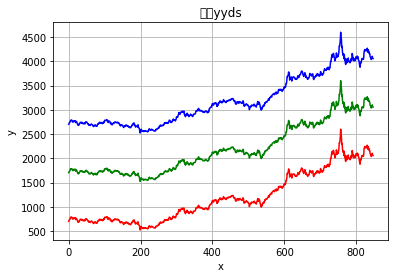

In [24]:
%matplotlib inline
plot_demo()

C:\Users\yangsy-c\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33541 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yangsy-c\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yangsy-c\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33541 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\yangsy-c\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0, flags=flags)


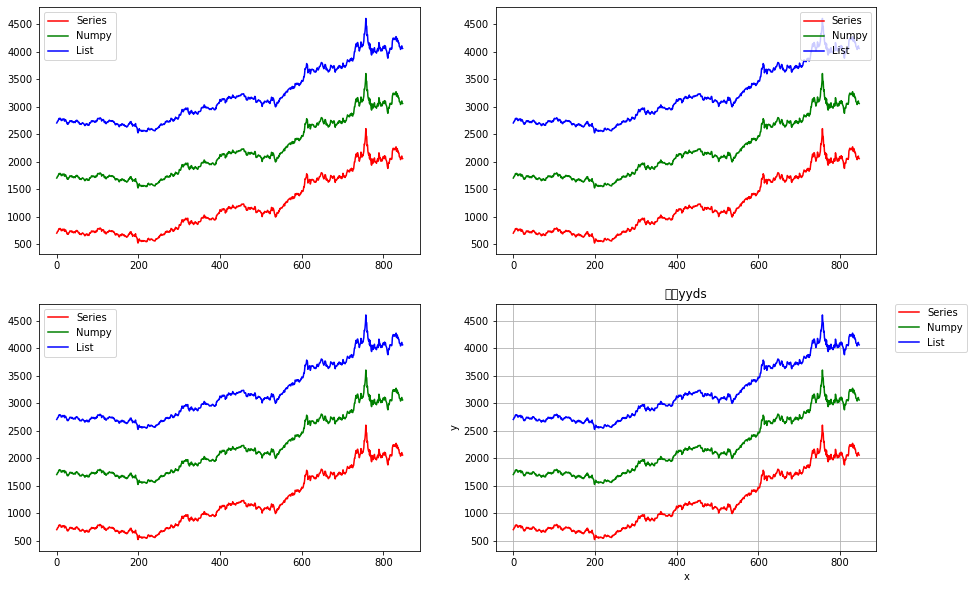

In [27]:
"""
plt 通过legend作标注;loc代表标注位置
"""
_, axs = plt.subplots(nrows = 2, ncols= 2, figsize = (15, 10))
# 画布0, loc, plot_demo传入画布,则使用传入的画布绘制
drawer = axs[0][0]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc = 0)
drawer = axs[0][1]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc = 1)
drawer = axs[1][0]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc = 2)

# 画布3  设置bbox_to_anchor, 在画布外的相对位置绘制
drawer = axs[1][1]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

In [28]:
# 绘制K线
import matplotlib.finance as mpf

__colorup__ = "red"
__colordown__ = "green"

# 为了清晰,只取30天

mt1 = mt[:30]
fig, ax = plt.subplots(figsize = (15, 7))
qutotes = []
for  index, (d,o,c,h,l) in enumerate(zip(mt1.index, mt1.open, mt1.close, mt1.high, mt1.low)):
    #蜡烛图,需要用matplotlib.finance.date2num转化为特有的数字值
    d = mpf.date2num(d)
    #日起,开盘收盘最高最低组成tuple对象
    val = (d, o, c, h, l)
    # 将val加入qutotes
    qutotes.append(val)

# 使用 mpf.candlestick_ochl绘制
mpf.candlestick_ochl(ax, qutotes, width = 0.6, colorup = __colorup__, colordown = __colordown__)
ax.autoscale_view()
ax.xaxis_date()

ModuleNotFoundError: No module named 'matplotlib.finance'

In [ ]:
"""
https://blog.csdn.net/wuwei_201/article/details/105781844
pip install --upgrade mplfinance
这里需要强调的是参数data的类型，data必须是pandas.DataFrame数据类型，对所包含的列也有要求，必须包含’Open’, ‘High’, ‘Low’ 和 ‘Close’ 数据（注意:首字母是大写的），而且行索引必须是pandas.DatetimeIndex，行索引的名称必须是’Date‘(同理注意首字母大写)，此外还有一列是’Volume’，这一列不是必须的，可选项（前提是你不想绘制成交量的话）
————————————————
版权声明：本文为CSDN博主「qd-hhkj」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/wuwei_201/article/details/105781844
"""